<a href="https://colab.research.google.com/github/ellaclauz/KPMG_VIRTUAL_INTERNSHIP/blob/main/KPMG_VIRTUAL_INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import date

In [2]:
# load in the data, which is in form of excel file into the pandas dataframe 
from google.colab import files
uploaded = files.upload()

Saving KPMG.xlsx to KPMG.xlsx


## Data Exploration and Cleaning

Let's take a look at the Transactions Table

In [3]:
# take a load at the dataset for Transactions table
df = pd.read_excel('KPMG.xlsx', sheet_name= "Transactions")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# Let's identify the number of rows and columns
df.shape

(20000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
# Let convert the float to date in the product first sold date
df['product_first_sold_date']= pd.to_datetime(df['product_first_sold_date']).dt.date

In [7]:
# check if the change has been effected
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [8]:
# Drop rows that contain missing values and update the dataframe
df = df.dropna()

In [9]:
df.shape

(19445, 13)

In [10]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,1107.337193,555.585260
std,5779.669087,30.571996,1011.889153,0.500012,582.662400,405.596541
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000
25%,4976.000000,18.000000,857.000000,0.000000,575.270000,215.140000
50%,9985.000000,45.000000,1741.000000,1.000000,1163.890000,507.580000
75%,14997.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000


Let's check for missing values in each of the rows

In [11]:
# how many rows with missing values
df.isna().any(axis=1).sum()

0

In [12]:
df.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [13]:
# column name
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [14]:
df['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [15]:
df['order_status'].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [16]:
# How many brands of bicycles are in this dataframe
df['brand'].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

Let's check for duplicate rows in the data

In [17]:
dup=df.duplicated()
df[dup].sum()

<ipython-input-17-5898cd6d6fd0>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[dup].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

Let's take a look at the New Customer List Table

In [18]:
# take a look at the dataset for New Customer List
df1 = pd.read_excel('KPMG.xlsx', sheet_name= "NewCustomerList")
df1.head()


<ipython-input-18-885576923646>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df1 = pd.read_excel('KPMG.xlsx', sheet_name= "NewCustomerList")


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.58,0.7250,0.90625,0.770312,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.55,0.5500,0.68750,0.584375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.56,0.5600,0.56000,0.560000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.91,1.1375,1.13750,1.137500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.40,0.4000,0.50000,0.500000,4,4,1.703125


In [19]:
# number of rows and columns
df1.shape

(1000, 23)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [21]:
# column names
df1.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [22]:
# drop irrelevant columns
df1 = df1.drop(columns={"Unnamed: 16", "Unnamed: 17", "Unnamed: 18",
       "Unnamed: 19", "Unnamed: 20"})

In [23]:
# Converting Date Of Birth to Age and Age class
df1["DOB"] = pd.to_datetime(df1["DOB"])
df1["age"] = df1["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))
df1['age_class'] = ((round(df1['age'] / 10)) * 10).astype('int', errors='ignore')

<ipython-input-23-f40f51e019d2>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df1["age"] = df1["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


In [24]:
# take a look at the dataframe
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0,60.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,52.0,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0,50.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.0,40.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0,60.0


In [25]:
df1.shape

(1000, 20)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [27]:
df1['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [28]:
# breakdown of the different genders in the gender column
df1['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [29]:
# replace 'U' with 'Unspecified' in the gender column
df1['gender']=df1['gender'].replace('U','Unspecified')

In [30]:
# take a look at the gender column
df1['gender'].value_counts()

Female         513
Male           470
Unspecified     17
Name: gender, dtype: int64

In [31]:
#Drop rows with missing values
df1=df1.dropna()

In [32]:
df1.shape

(715, 20)

Check for missing values in the dataframe

In [33]:
# total number of missing values
df1.isna().any(axis=1).sum()

0

In [34]:
# checking for columns with missing values
df1.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
age_class                              0
dtype: int64

In [35]:
# check for duplicate rows
df1.duplicated().sum()

0

In [36]:
df1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,age,age_class
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,49.806993,11.349650,3033.420979,7.386014,507.942657,0.873785,50.667133,50.755245
std,27.735227,5.011274,851.685794,2.830274,290.855597,0.296971,17.048160,17.473155
min,0.000000,1.000000,2000.000000,1.000000,1.000000,0.340000,20.000000,20.000000
25%,27.000000,7.000000,2212.500000,6.000000,252.000000,0.637500,37.000000,40.000000
50%,51.000000,11.000000,3013.000000,8.000000,524.000000,0.836719,49.000000,50.000000
75%,71.500000,15.000000,3855.000000,9.000000,760.000000,1.073125,65.000000,60.000000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750,84.000000,80.000000


Let's take a look at the Customer Demographic dataframe

In [37]:
Cust = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
Cust.head()

<ipython-input-37-f73bbf3cd363>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Cust = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [38]:
Cust.shape

(4000, 13)

In [39]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [40]:
# take a look at the 'default' column
Cust['default']

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [41]:
# remove the 'default' column since it's irrelevant to our analysis
Cust= Cust.drop(columns={"default"})

In [42]:
# take a look at the dataframe
Cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [43]:
# number of rows and columns in the data
Cust.shape

(4000, 12)

In [44]:
# total number of duplicate rows
Cust.duplicated().sum()

0

In [45]:
# breakdown of the gender sex in the gender column
Cust['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [46]:
# replacing the sex name of the gender column
Cust['gender']= Cust['gender'].replace('F', 'Female').replace('M', 'Male').replace('Femal', 'Female').replace('U', 'Unspecified')

In [47]:
Cust['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [48]:
# replacing deceased indicator and owns car (N with 0 and Y with 1)
Cust['deceased_indicator']= Cust['deceased_indicator'].replace ('N', '0').replace('Y', '1')
Cust['owns_car']= Cust['owns_car'].replace('No', '0').replace('Yes', '1')


In [49]:
import datetime as dt

In [50]:
# Converting DOB to Age
Cust["DOB"] = pd.to_datetime(Cust["DOB"])
Cust["age"] = Cust["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

<ipython-input-50-7b082fc8bd4e>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  Cust["age"] = Cust["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


In [51]:
# Converting DOB to Age class
Cust['age_class'] = ((round(Cust['age'] / 10)) * 10).astype('int', errors='ignore')

In [52]:
# Drop rows with missing values in the customer demographic dataframe
Cust.dropna()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,69.0,70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,42.0,40.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15.0,68.0,70.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,0,1,8.0,49.0,50.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,0,1,20.0,34.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,0,0,10.0,48.0,50.0
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,0,0,12.0,33.0,30.0
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,0,1,14.0,47.0,50.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,0,0,19.0,47.0,50.0


Let's take a look at the Customer Address dataframe 

In [53]:
CustAd= pd.read_excel('KPMG.xlsx', sheet_name= 'CustomerAddress')
CustAd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [54]:
CustAd.shape

(3999, 6)

In [55]:
# Breakdown of the states in the dataframe 
CustAd['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [56]:
# Replacing similar state names
CustAd['state'] = CustAd['state'].replace('New South Wales', 'NSW').replace('Victoria', 'VIC')

In [57]:
# drop rows with missing values
CustAd=CustAd.dropna()

In [58]:
CustAd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 218.7+ KB


In [59]:
CustAd.shape

(3999, 6)

In [60]:
CustAd.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [61]:
# Checking for duplicate rows
CustAd.duplicated().sum()

0

We want to merge the Customer Demoghaphic dataframe with the Customer Address dataframe to become one dataset

In [62]:
Customerdemo_Add = pd.merge( Cust, CustAd, how="inner", on="customer_id")
Customerdemo_Add.dropna()
Customerdemo_Add.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,69.0,70.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,42.0,40.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,0,7.0,61.0,60.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,1,8.0,45.0,40.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,0,1,13.0,56.0,60.0,9 Oakridge Court,3216,VIC,Australia,9


In [63]:
Customerdemo_Add.shape

(3996, 19)

Back to the Transaction dataframe

In [64]:
df['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

From th Transaction dataframe, we want get how long ago a customer purchased a product and also, get the profit by subtracting the standard cost from list price.

In [65]:
most_recent_purchase = df['transaction_date'].max()
df['last_purchase_days_ago'] = most_recent_purchase - df['transaction_date']
df['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
df['profit'] = df['list_price'] - df['standard_cost']
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,308.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,223.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,75.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,121.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,90.0,1055.82


What is RFM analysis?
RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Recency: How recently has the customer made a transaction with us

Frequency: How frequent is the customer in ordering/buying some product from us

Monetary: How much does the customer spend on purchasing products from us.

In [66]:
rfmTable =df.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(), 
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
 })
rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency',
    'customer_id': 'frequency',
    'profit': 'monetary_value'
    }, inplace=True
)

In [67]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [68]:
rfmTable.shape

(3492, 3)

In [69]:
# Getting the quartile of the rfm Table
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [70]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1


In [71]:
rfmSeg = rfmTable


In [72]:
# rfm segmentation using quartiles
rfmSeg['r_score'] = rfmTable['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmTable['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmTable['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()


,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,3
2,128.0,3,2226.26,4,4,2
3,102.0,7,3290.21,4,3,3
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,3,2


In [73]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,3,113,5
2,128.0,3,2226.26,4,4,2,442,10
3,102.0,7,3290.21,4,3,3,433,10
4,195.0,2,220.57,4,4,4,444,12
5,16.0,6,2394.94,1,3,2,132,6


In [74]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [75]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,3,113,5,silver
2,128.0,3,2226.260000,4,4,2,442,10,basic
3,102.0,7,3290.210000,4,3,3,433,10,basic
4,195.0,2,220.570000,4,4,4,444,12,basic
5,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,344,11,basic
3498,127.0,6,3147.330000,4,3,3,433,10,basic
3499,51.0,7,4955.250000,3,3,1,331,7,basic


In [76]:
# Merging the RFM segment with the Customer Demograhic/Address dataframe
Customerdemo_Add_df = pd.merge(rfmSeg, Customerdemo_Add, left_index=True, right_index=True)
Customerdemo_Add_df.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'customer_id',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_class', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [77]:
Customerdemo_Add_df.shape

(3491, 28)

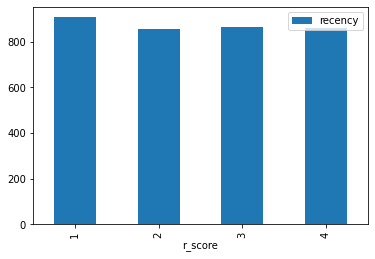

In [78]:
Customerdemo_Add_df.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

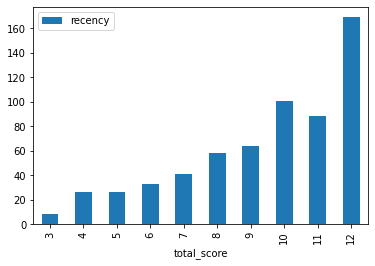

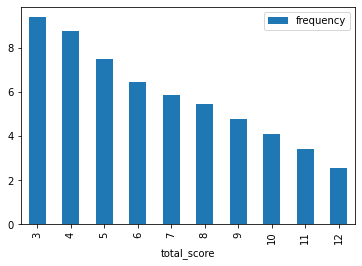

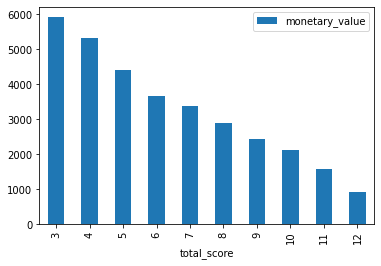

In [79]:
Customerdemo_Add_df.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
Customerdemo_Add_df.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
Customerdemo_Add_df.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

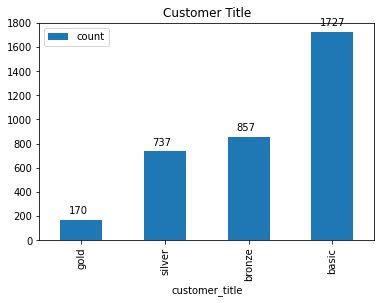

In [80]:
customer_titles_df = Customerdemo_Add_df.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

From the bar chart above, we have more of basic customers followed by the bronze customers

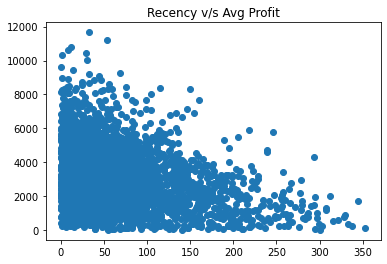

In [81]:
plt.scatter(Customerdemo_Add_df['recency'], Customerdemo_Add_df['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

The points are clustered around a line, which indicates a positive association between Recency and Monetary Value 

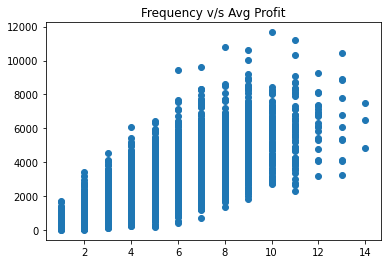

In [82]:
plt.scatter(Customerdemo_Add_df['frequency'], Customerdemo_Add_df['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

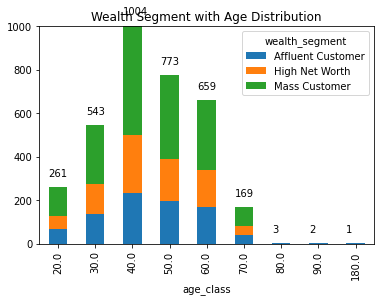

In [112]:
Customerdemo_Add_df.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(Customerdemo_Add_df.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.savefig('Wealth Segment with Age Distribution')

From the chart above, mass customers are highest in all ages after that comes the high net worth customers.

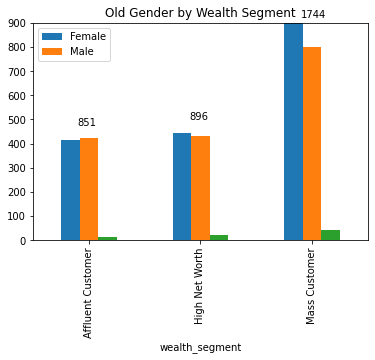

In [116]:
Customerdemo_Add_df.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(Customerdemo_Add_df.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.savefig('Old Gender by Wealth Segment.png')

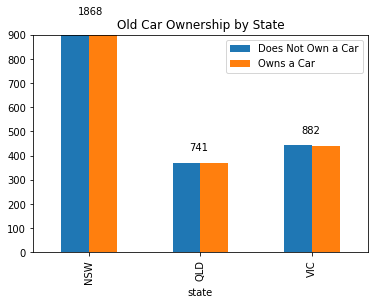

In [117]:
Customerdemo_Add_df.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(Customerdemo_Add_df.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.savefig('Car Ownership by State')

NSW has the highest number of customers who own car and customers who doesn't own cars.

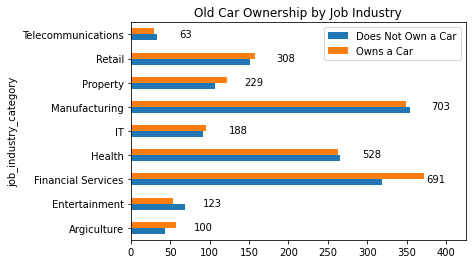

In [111]:
Customerdemo_Add_df.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(Customerdemo_Add_df.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.savefig('Old Car Ownership by Job Industry.png')

Manufacturing, Financial Services and Health are the job industry category having more customers who doesn't own a car.

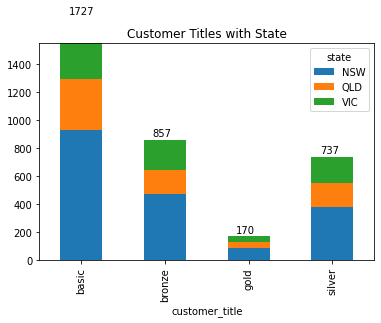

In [87]:
Customerdemo_Add_df.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(Customerdemo_Add_df.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

There are more Basic customers across states as shown in the chart above

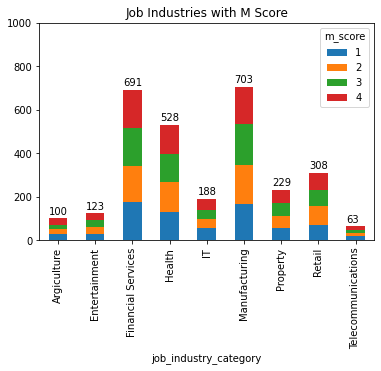

In [110]:
Customerdemo_Add_df.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(Customerdemo_Add_df.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.savefig('Job Industries with M Score.png')

The Top 3 industry category bringing in the highest profit are Manufacturing, Financial Services and Health.

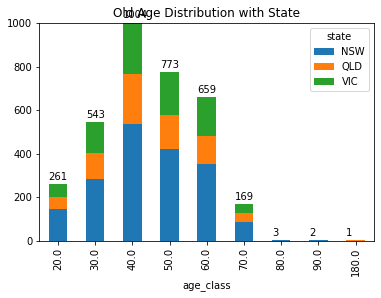

In [89]:
Customerdemo_Add_df.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(Customerdemo_Add_df.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

The highest number of customers are aged between 40-49yrs across all states.

In [90]:
count = Customerdemo_Add_df.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
count

,count
gender,
Female,84750
Male,82286
Unspecified,3157


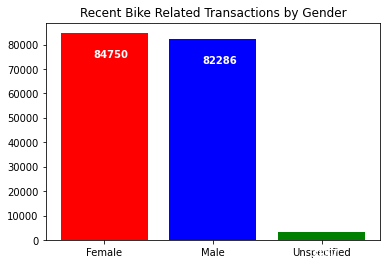

In [109]:
labels = ['Female', 'Male', 'Unspecified']
plt.bar(labels, count['count'], color=['red','blue', 'green'])
for i, v in enumerate(count['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Transactions by Gender')
plt.savefig('Recent Bike Related Transactions by Gender.png')

From our chart above, it shows that on average females have made more bike related purchase in the last three years compared to male

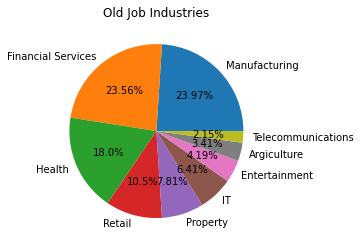

In [92]:
Customerdemo_Add_df.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [93]:
c = Customerdemo_Add_df.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1727
bronze,857
gold,170
silver,737


In [94]:
c = Customerdemo_Add_df.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c


count
state customer_title       
NSW   basic             930
      bronze            470
      gold               89
      silver            379
QLD   basic             363
      bronze            170
      gold               38
      silver            170
VIC   basic             434
      bronze            217
      gold               43
      silver            188

In [95]:
c = Customerdemo_Add_df.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,165
4,358
5,671
6,1063
7,1567
8,2064
9,2522
10,2892
11,3114


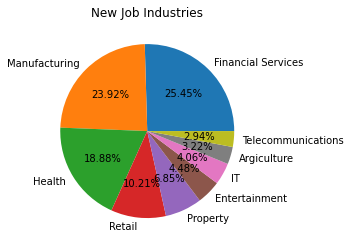

In [96]:
df1.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

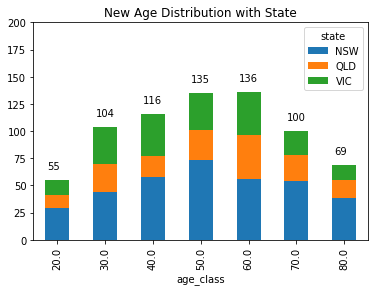

In [118]:
df1.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(df1.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.savefig('New Age Distribution with State')

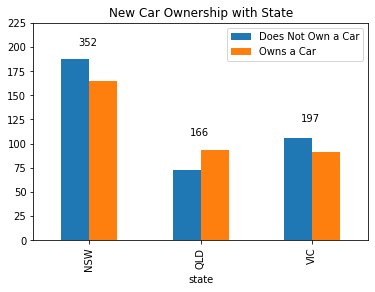

In [119]:
df1.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(df1.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.savefig('New Car Ownership with State')

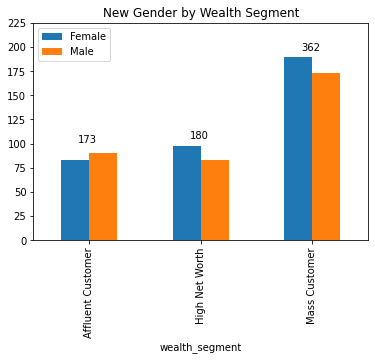

In [120]:
df1.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(df1.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male',], loc='upper left')
plt.savefig('New Gender by Wealth Segment')

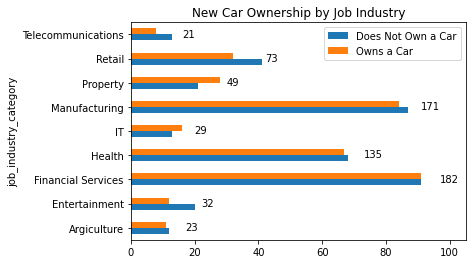

In [100]:
df1.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(df1.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.savefig("job_industry_category.png")
 


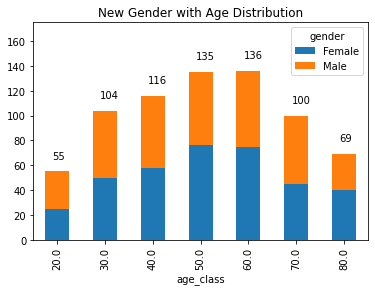

In [101]:
df1.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(df1.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()


In [102]:
Customerdemo_Add_df['customer_segment'] =Customerdemo_Add_df['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
Customerdemo_Add_df

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,5,silver,2,...,1,16.0,42.0,40.0,6 Meadow Vale Court,2153,NSW,Australia,10,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,4,...,0,7.0,61.0,60.0,0 Holy Cross Court,4211,QLD,Australia,9,Losing
3,102.0,7,3290.21,4,3,3,433,10,basic,5,...,1,8.0,45.0,40.0,17979 Del Mar Point,2448,NSW,Australia,4,Losing
4,195.0,2,220.57,4,4,4,444,12,basic,6,...,1,13.0,56.0,60.0,9 Oakridge Court,3216,VIC,Australia,9,Lost
5,16.0,6,2394.94,1,3,2,132,6,silver,7,...,1,11.0,46.0,50.0,4 Delaware Trail,2210,NSW,Australia,9,Recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,3501,...,1,18.0,52.0,50.0,16 Carberry Pass,2119,NSW,Australia,11,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,3502,...,1,3.0,25.0,20.0,12 Elgar Place,2155,NSW,Australia,10,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,3503,...,1,10.0,43.0,40.0,8749 Menomonie Point,2122,NSW,Australia,11,Losing
3499,51.0,7,4955.25,3,3,1,331,7,basic,3504,...,1,6.0,59.0,60.0,18072 American Parkway,3195,VIC,Australia,10,Average


In [103]:
top_1000 = Customerdemo_Add_df.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
2070,4.0,8,4731.20,1,1,1,111,3,gold,2075,...,0,8.0,49.0,50.0,61 Upham Parkway,4558,QLD,Australia,4,Platinum
3402,12.0,9,6036.19,1,1,1,111,3,gold,3407,...,1,19.0,61.0,60.0,02181 Starling Trail,3015,VIC,Australia,10,Platinum
3086,11.0,9,5713.88,1,1,1,111,3,gold,3091,...,1,3.0,27.0,30.0,9503 Aberg Drive,3021,VIC,Australia,7,Platinum
2523,14.0,9,4572.03,1,1,1,111,3,gold,2528,...,0,15.0,44.0,40.0,3 Myrtle Terrace,4161,QLD,Australia,7,Platinum
877,17.0,9,4918.87,1,1,1,111,3,gold,882,...,1,11.0,57.0,60.0,65345 Marcy Crossing,2065,NSW,Australia,12,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,21.0,8,5387.47,2,1,1,211,4,bronze,1863,...,0,20.0,44.0,40.0,904 Mandrake Parkway,2820,NSW,Australia,1,Very Loyal
2190,41.0,8,6260.31,2,1,1,211,4,bronze,2195,...,1,13.0,35.0,40.0,9 Barnett Street,4179,QLD,Australia,10,Very Loyal
2189,40.0,10,4914.08,2,1,1,211,4,bronze,2194,...,1,11.0,64.0,60.0,9045 Kings Avenue,4153,QLD,Australia,11,Very Loyal
1762,21.0,12,5870.93,2,1,1,211,4,bronze,1767,...,1,19.0,63.0,60.0,3 Nevada Road,4215,QLD,Australia,3,Very Loyal


In [104]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 4.6 MB/s 


In [105]:
import xlsxwriter

In [106]:
writer = pd.ExcelWriter('kpmg_cleaned_data.xlsx',
                        engine = 'xlsxwriter')
Customerdemo_Add_df.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()


In [107]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
